**GOAL**:

Use LASSO to sort through the 1148 factors generated by big_factors.ipynb

In [139]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [140]:
df = pd.read_csv('exported/big_factors.csv')
df.head(3)

,caldt,AgricMinusFood,AgricMinusSoda,AgricMinusBeer,AgricMinusSmoke,AgricMinusToys,AgricMinusFun,AgricMinusBooks,AgricMinusHshld,AgricMinusClths,...,MealsMinusBanks,MealsMinusInsur,MealsMinusRlEst,MealsMinusFins,BanksMinusInsur,BanksMinusRlEst,BanksMinusFins,InsurMinusRlEst,InsurMinusFins,RlEstMinusFins
0,1963-07-31,3.50,0.47,5.23,5.58,8.11,3.74,3.11,3.19,3.71,...,-2.63,-2.47,0.27,-5.83,0.16,2.90,-3.20,2.74,-3.36,-6.10
1,1963-08-31,-5.05,-5.82,-2.46,-7.47,-5.35,-8.16,-5.60,-6.54,-5.15,...,-3.08,-1.83,-2.37,-4.38,1.25,0.71,-1.30,-0.54,-2.55,-2.01
2,1963-09-30,-0.41,-1.04,-3.17,2.29,3.21,0.32,-4.92,-0.57,2.10,...,0.60,-1.15,1.54,1.73,-1.75,0.94,1.13,2.69,2.88,0.19


In [141]:
mapper = DataFrameMapper([(df.columns[1:], StandardScaler())]).fit(df)
scaled_vals = mapper.transform(df)
X = pd.DataFrame(scaled_vals, columns=df.columns[1:])
X['caldt'] = df['caldt']
X.set_index('caldt', inplace=True)
X.describe()

,AgricMinusFood,AgricMinusSoda,AgricMinusBeer,AgricMinusSmoke,AgricMinusToys,AgricMinusFun,AgricMinusBooks,AgricMinusHshld,AgricMinusClths,AgricMinusHlth,...,MealsMinusBanks,MealsMinusInsur,MealsMinusRlEst,MealsMinusFins,BanksMinusInsur,BanksMinusRlEst,BanksMinusFins,InsurMinusRlEst,InsurMinusFins,RlEstMinusFins
count,711.000000,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,...,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02,7.110000e+02
mean,0.000000,-3.966198e-17,9.993569e-18,1.998714e-17,-1.499035e-17,1.499035e-17,9.993569e-18,-7.495177e-18,-1.249196e-17,1.998714e-17,...,-7.495177e-18,2.498392e-18,-2.498392e-18,-1.499035e-17,7.495177e-18,9.993569e-18,1.499035e-17,2.248553e-17,9.993569e-18,1.249196e-17
std,1.000704,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,...,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00,1.000704e+00
min,-3.517023,-5.503411e+00,-3.174523e+00,-4.665747e+00,-3.100098e+00,-5.018230e+00,-4.620195e+00,-3.501438e+00,-3.580323e+00,-1.193767e+00,...,-3.894446e+00,-5.000591e+00,-1.016964e+01,-4.005918e+00,-4.574897e+00,-8.218775e+00,-6.501978e+00,-9.092829e+00,-4.530000e+00,-3.756614e+00
25%,-0.597815,-5.877101e-01,-5.987451e-01,-6.166111e-01,-6.186425e-01,-6.026037e-01,-6.096142e-01,-6.303276e-01,-5.870178e-01,-4.596281e-01,...,-6.131552e-01,-5.426441e-01,-5.434520e-01,-5.839389e-01,-5.594992e-01,-5.643151e-01,-4.701443e-01,-5.234943e-01,-4.904395e-01,-5.083990e-01
50%,-0.038963,-6.868772e-03,-3.290294e-02,3.705797e-02,4.522151e-03,2.800053e-02,-4.190647e-02,-3.885053e-02,6.097232e-03,-2.911424e-01,...,3.011948e-02,-2.030096e-02,-1.226050e-02,-1.742562e-02,1.786120e-02,-3.953249e-04,-5.537375e-03,6.771453e-03,-1.858865e-02,1.655595e-02
75%,0.594345,5.658012e-01,6.038688e-01,6.115366e-01,6.339884e-01,5.768986e-01,5.973891e-01,6.015706e-01,5.945906e-01,-1.185163e-01,...,6.458533e-01,5.370711e-01,5.747992e-01,5.640221e-01,5.821591e-01,5.317045e-01,5.033818e-01,5.361777e-01,4.956229e-01,5.144047e-01
max,5.778913,4.439665e+00,4.879564e+00,5.290029e+00,3.697298e+00,4.856348e+00,4.208410e+00,3.946361e+00,4.224147e+00,3.387195e+00,...,3.787473e+00,3.972997e+00,4.356102e+00,4.793457e+00,4.014971e+00,4.206906e+00,4.551908e+00,4.372654e+00,4.575191e+00,9.333828e+00


In [142]:
url = 'http://diether.org/prephd/10-port_mom_ew.csv'
port = pd.read_csv(url,parse_dates=['caldt'])
port = port.query('caldt >= "1963-07-31" and caldt <= "2023-02-28"')
port.set_index('caldt', inplace=True)
port.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 711 entries, 1963-07-31 to 2022-09-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   p0      711 non-null    float64
 1   p1      711 non-null    float64
 2   p2      711 non-null    float64
 3   p3      711 non-null    float64
 4   p4      711 non-null    float64
dtypes: float64(5)
memory usage: 33.3 KB


In [143]:
y = port['p4'] - port['p0'] # Our spread portfolio

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [145]:
alpha_grid = {'alpha': np.logspace(-1, 0, 200)}
lasso_grid = GridSearchCV(Lasso(),alpha_grid,cv=5,return_train_score=True, n_jobs=-1)
best_lasso=lasso_grid.fit(X_train,y_train)
print("Best alpha: ",best_lasso.best_estimator_.get_params()['alpha'])
print("Train set score: {:.2f}".format(lasso_grid.score(X_train,y_train)))

# Now score the test set
print("Test set score: {:.2f}".format(lasso_grid.score(X_test,y_test)))

# And the MSE:
y_pred = lasso_grid.predict(X_test)
print("MSE: {:.2f}".format(mean_squared_error(y_test, y_pred)))

Best alpha:  0.36123426997094316
Train set score: 0.20
Test set score: 0.07
MSE: 33.79


In [146]:
print(f'Using GridSearchCV, we retain {np.sum(np.ceil(best_lasso.best_estimator_.coef_)) : .0f} Xs out of {len(X.columns)} Xs')

Using GridSearchCV, we retain  14 Xs out of 1128 Xs


In [147]:
mask = [True if x > 0.001 else False for x in list(best_lasso.best_estimator_.coef_)]
kept = pd.Series(X.columns)[mask]
kept

17     AgricMinusSteel
35     AgricMinusChips
105     SodaMinusTxtls
149     BeerMinusTxtls
178     BeerMinusBanks
348    HshldMinusClths
354    HshldMinusTxtls
362     HshldMinusAero
375    HshldMinusChips
378    HshldMinusBoxes
383    HshldMinusBanks
486    MedEqMinusChips
519    DrugsMinusHardw
529    DrugsMinusBanks
dtype: object

In [148]:
default = Lasso(max_iter=1000).fit(X_train,y_train).coef_
print(f'Using the default LASSO params, we retain {np.sum(np.ceil(default)) : .0f} Xs out of {len(X.columns)} Xs')

Using the default LASSO params, we retain  6 Xs out of 1128 Xs


In [149]:
mask = [True if x > 0.001 else False for x in list(default)]
pd.Series(X.columns)[mask]

149     BeerMinusTxtls
178     BeerMinusBanks
361    HshldMinusAutos
519    DrugsMinusHardw
521    DrugsMinusChips
529    DrugsMinusBanks
dtype: object

Now let's try using the GridSearchCV retained coefficients for LASSO

In [150]:
kept = list(kept)
print(kept)

['AgricMinusSteel', 'AgricMinusChips', 'SodaMinusTxtls', 'BeerMinusTxtls', 'BeerMinusBanks', 'HshldMinusClths', 'HshldMinusTxtls', 'HshldMinusAero', 'HshldMinusChips', 'HshldMinusBoxes', 'HshldMinusBanks', 'MedEqMinusChips', 'DrugsMinusHardw', 'DrugsMinusBanks']


In [151]:
y

caldt
1963-07-31    1.257761
1963-08-30    3.739185
1963-09-30    0.929515
1963-10-31    3.015301
1963-11-29    0.753256
                ...   
2022-05-31    6.592141
2022-06-30   -3.787095
2022-07-29   -3.582628
2022-08-31   -0.193795
2022-09-30    2.012221
Length: 711, dtype: float64

In [152]:
subset = X[kept].reset_index(drop = True)
subset['ret'] = y.reset_index(drop = True)
subset

,AgricMinusSteel,AgricMinusChips,SodaMinusTxtls,BeerMinusTxtls,BeerMinusBanks,HshldMinusClths,HshldMinusTxtls,HshldMinusAero,HshldMinusChips,HshldMinusBoxes,HshldMinusBanks,MedEqMinusChips,DrugsMinusHardw,DrugsMinusBanks,ret
0,0.606461,0.584298,-0.162165,-0.878519,-0.152332,0.134815,-0.584478,0.766064,0.173176,-0.115244,0.310362,-0.056372,0.146697,0.420152,1.257761
1,-1.229077,-1.070887,0.144983,-0.350204,-0.418713,0.303882,0.321849,0.601337,-0.134279,0.163655,0.445749,0.254621,0.827600,1.035070,3.739185
2,-0.343146,0.259836,0.005897,0.329701,0.789512,0.552625,-0.028619,0.790125,0.420801,0.161331,0.375940,0.036411,-0.987600,-0.225803,0.929515
3,-0.271164,-1.422507,-0.698224,-1.076637,-0.032461,0.371898,-0.230750,0.284838,-0.902084,0.212463,1.181920,-0.068399,-0.953473,0.763498,3.015301
4,-0.204720,-0.694969,-0.401218,-0.432754,0.456537,0.278619,-0.344856,-1.116269,-0.305456,0.028854,0.669985,-0.169772,-0.136064,0.241690,0.753256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,2.090395,1.240369,-0.405565,-0.623367,-0.989527,0.292223,-1.213691,-0.281527,-0.596291,-0.110595,-1.796609,-0.149154,0.733346,-0.270419,6.592141
707,1.153246,-0.176115,1.656091,1.647485,2.317393,1.868242,1.412375,-0.166773,1.462822,1.383838,2.087324,0.563895,1.437000,2.487985,-3.787095
708,-1.994577,-1.532567,-0.547548,-0.231634,-0.616595,-2.123303,-0.985479,-0.981155,-2.691967,-1.453958,-1.637951,-1.776279,-1.364615,-1.616644,-3.582628
709,0.862550,1.557684,1.101197,1.524412,0.256752,0.781935,1.645477,-0.039063,0.606936,1.632523,0.272284,0.137784,-0.035310,-0.413964,-0.193795


In [153]:
ols('ret ~ 1 + ' + ' + '.join(kept), data=subset).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     10.31
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           3.94e-20
Time:                        17:54:46   Log-Likelihood:                -2124.0
No. Observations:                 711   AIC:                             4276.
Df Residuals:                     697   BIC:                             4340.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.4033      0.182      7.720      0.000       1.046       1.760
AgricMinusSteel     0.2124      0.273      0.778      0.437      -0.324       0.749
AgricMinusChips     0.6858      0.344      1.994      0.047       0.011       1.361
SodaMinusTxtls     -0.1964      0.283     -0.695      0.487      -0.751       0.358
BeerMinusTxtls      0.2917      0.205      1.423      0.155      -0.111       0.694
BeerMinusBanks      0.3064      0.213      1.441      0.150      -0.111       0.724
HshldMinusClths     0.5770      0.249      2.322      0.021       0.089       1.065
HshldMinusTxtls     0.6840      0.254      2.694      0.007       0.185       1.183
HshldMinusAero      0.3168      0.227      1.393      0.164      -0.130       0.763
HshldMinusChips    -1.5018      0.484     -3.106      0.002      -2.451      -0.552
HshldMinusBoxes    -0.0241      0.224     -0.108      0.914      -0.463       0.415
HshldMinusBanks     0.8172      0.347      2.356      0.019       0.136       1.498
MedEqMinusChips     0.7629      0.363      2.104      0.036       0.051       1.475
DrugsMinusHardw     0.6249      0.288      2.168      0.031       0.059       1.191
DrugsMinusBanks    -0.1456      0.387     -0.377      0.707      -0.905       0.613
==============================================================================
Omnibus:                      115.429   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              727.946
Skew:                          -0.546   Prob(JB):                    8.48e-159
Kurtosis:                       7.835   Cond. No.                     1.01e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.58e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

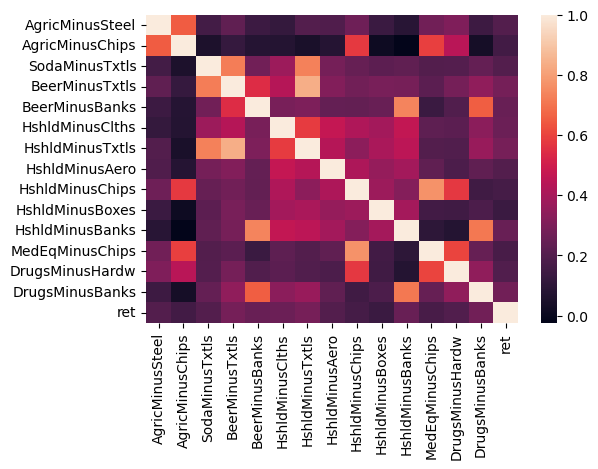

In [154]:
# I don't see massive multicollinearity in the heatmap, but I'll check the VIFs anyway
plt.rcParams["figure.figsize"] = (6, 4)
sns.heatmap(subset.corr(), annot = False)
plt.show()

In [155]:
vif_data = pd.DataFrame()
vif_data["feature"] = subset.columns

vif_data["VIF"] = [variance_inflation_factor(subset.values, i)
                          for i in range(len(subset.columns))]
vif_data

,feature,VIF
0,AgricMinusSteel,2.259529
1,AgricMinusChips,3.598368
2,SodaMinusTxtls,2.418254
3,BeerMinusTxtls,inf
4,BeerMinusBanks,inf
5,HshldMinusClths,1.882246
6,HshldMinusTxtls,inf
7,HshldMinusAero,1.568442
8,HshldMinusChips,7.165688
9,HshldMinusBoxes,1.512019


In [156]:
# Let's take out BeerMinusTextiles and BeerMinusBanks
kept.remove('BeerMinusTxtls')
kept.remove('BeerMinusBanks')

subset = X[kept].reset_index(drop = True)
subset['ret'] = y.reset_index(drop = True)

vif_data = pd.DataFrame()
vif_data["feature"] = subset.columns

vif_data["VIF"] = [variance_inflation_factor(subset.values, i)
                          for i in range(len(subset.columns))]
vif_data

,feature,VIF
0,AgricMinusSteel,2.258593
1,AgricMinusChips,3.562258
2,SodaMinusTxtls,2.250212
3,HshldMinusClths,1.872176
4,HshldMinusTxtls,3.263264
5,HshldMinusAero,1.567804
6,HshldMinusChips,7.163725
7,HshldMinusBoxes,1.511315
8,HshldMinusBanks,4.805349
9,MedEqMinusChips,3.984327


Much better. Let's look at the new regression

In [157]:
ols('ret ~ 1 + ' + ' + '.join(kept), data=subset).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     10.86
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           5.22e-20
Time:                        17:54:47   Log-Likelihood:                -2125.7
No. Observations:                 711   AIC:                             4277.
Df Residuals:                     698   BIC:                             4337.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.4033      0.182      7.707      0.000       1.046       1.761
AgricMinusSteel     0.2032      0.274      0.743      0.458      -0.334       0.740
AgricMinusChips     0.7515      0.343      2.194      0.029       0.079       1.424
SodaMinusTxtls     -0.0619      0.273     -0.227      0.821      -0.598       0.474
HshldMinusClths     0.5464      0.248      2.200      0.028       0.059       1.034
HshldMinusTxtls     0.8346      0.328      2.548      0.011       0.192       1.478
HshldMinusAero      0.3098      0.228      1.361      0.174      -0.137       0.757
HshldMinusChips    -1.5229      0.484     -3.145      0.002      -2.474      -0.572
HshldMinusBoxes    -0.0154      0.224     -0.069      0.945      -0.455       0.424
HshldMinusBanks     0.9756      0.398      2.454      0.014       0.195       1.756
MedEqMinusChips     0.7246      0.362      1.999      0.046       0.013       1.436
DrugsMinusHardw     0.6782      0.287      2.361      0.018       0.114       1.242
DrugsMinusBanks    -0.0409      0.383     -0.107      0.915      -0.793       0.711
==============================================================================
Omnibus:                      121.306   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              767.518
Skew:                          -0.587   Prob(JB):                    2.17e-167
Kurtosis:                       7.953   Cond. No.                         8.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
subset.drop('ret', axis = 1, inplace = True)
subset['caldt'] = df['caldt']
subset.to_csv('exported/lasso_industry_factors.csv', index = False)